# **Predict automobile price**

In [1]:
import pandas as pd
import numpy as np
import warnings # current version of seaborn generates a bunch of warnings that we'll ignore
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

In [3]:
#load the dataset
automobile_price = pd.read_csv('/content/AutoData (1).csv')

In [4]:
automobile_price.head()

,symboling,make,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# **- Perform EDA on the data**

In [5]:
automobile_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [6]:
automobile_price.shape

(205, 25)

In [7]:
automobile_price.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# **- Perform data cleanup as required**

In [8]:
automobile_price.columns

Index(['symboling', 'make', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [9]:
# symboling: -2 (least risky) to +3 most risky
# Most cars are 0,1,2
automobile_price['symboling'].astype('category').value_counts()

0     67
1     54
2     32
3     27
-1    22
-2     3
Name: symboling, dtype: int64

In [10]:
# aspiration: An (internal combustion) engine property showing 
# whether the oxygen intake is through standard (atmospheric pressure)
# or through turbocharging (pressurised oxygen intake)
automobile_price['aspiration'].astype('category').value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [11]:
# drivewheel: frontwheel, rear wheel or four-wheel drive 
automobile_price['drivewheel'].astype('category').value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

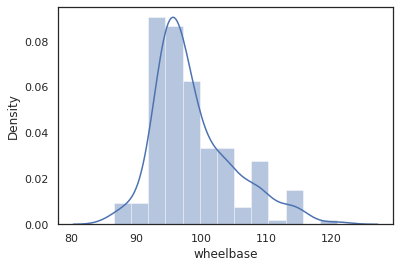

In [12]:
# wheelbase: distance between centre of front and rear wheels
sns.distplot(automobile_price['wheelbase']);


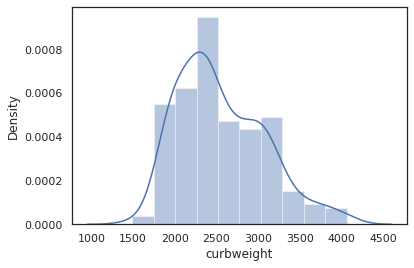

In [13]:
# curbweight: weight of car without occupants or baggage
sns.distplot(automobile_price['curbweight']);


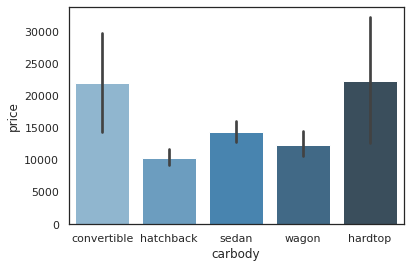

In [14]:
# carbody: Hardtop and convertible are the most expensive whereas hatchbacks are the cheapest.
sns.barplot(x="carbody", y="price", data=automobile_price, palette="Blues_d");

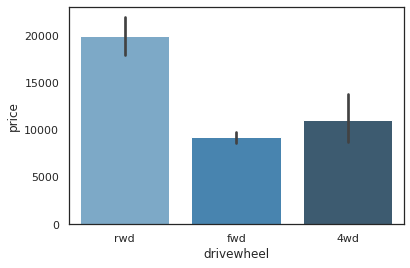

In [15]:
# drivewheel: Cars with Rear wheel drive have a higher price value.
sns.barplot(x="drivewheel", y="price", data=automobile_price, palette="Blues_d");

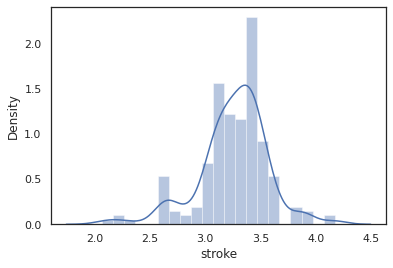

In [16]:
# stroke: volume of the engine (the distance traveled by the piston in each cycle)
sns.distplot(automobile_price['stroke']);

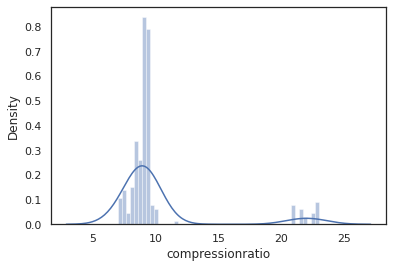

In [17]:
# compression ration: ration of volume of compression chamber 
# at largest capacity to least capacity
sns.distplot(automobile_price['compressionratio']);

In [18]:
#A single variable mileage can be calculated taking the weighted average of 55% city and 45% highways.
automobile_price['mileage'] = automobile_price['citympg']*0.55 + automobile_price['highwaympg']*0.45

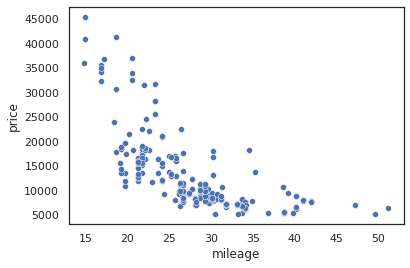

In [19]:
# Let's see how price varies with mileage.
# mileage : Mileage has a negative correlation with price.
sns.scatterplot(x = 'mileage', y = 'price', data = automobile_price);

In [20]:
# Car Names
automobile_price.make.values[0:10]

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 100ls', 'audi 5000', 'audi 4000',
       'audi 5000s (diesel)'], dtype=object)

In [21]:
# It is observed that Car Name consists of two parts 'car company' + ' ' + 'Car Model'
# Let's split out car company to a new column.

In [22]:
automobile_price['brand'] = automobile_price.make.str.split(' ').str.get(0).str.upper()

In [23]:
len(set(automobile_price.brand.values))

27

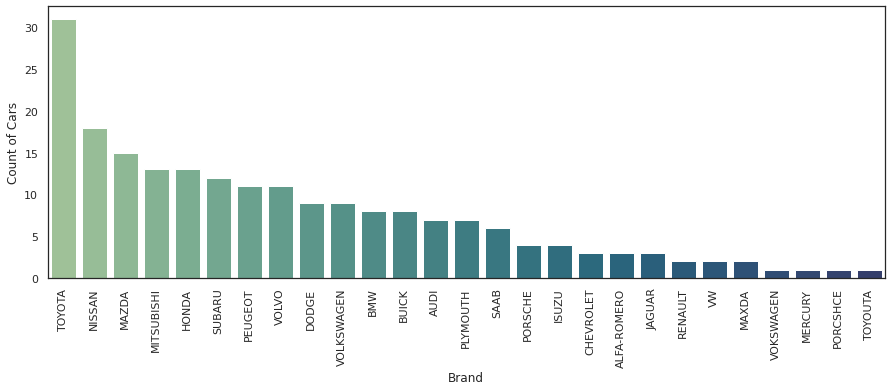

<Figure size 432x288 with 0 Axes>

In [24]:
# Let's see companies and their no of models.
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(automobile_price['brand'], order=pd.value_counts(automobile_price['brand']).index, palette = 'crest')
plt1.set(xlabel = 'Brand', ylabel= 'Count of Cars')
plt.xticks(rotation = 90)
plt.show()
plt.tight_layout()

In [25]:
# It's noticed that in brand names,
# VOLKSWAGON has three different values as VOLKSWAGEN, VOKSWAGEN and VW
# PORSCHE as PORSCHE and PORCSCHE.
# Let's fix these data issues.
automobile_price['brand'] = automobile_price['brand'].replace(['VW', 'VOKSWAGEN'], 'VOLKSWAGEN')
automobile_price['brand'] = automobile_price['brand'].replace(['PORCSHCE'], 'PORSCHE')

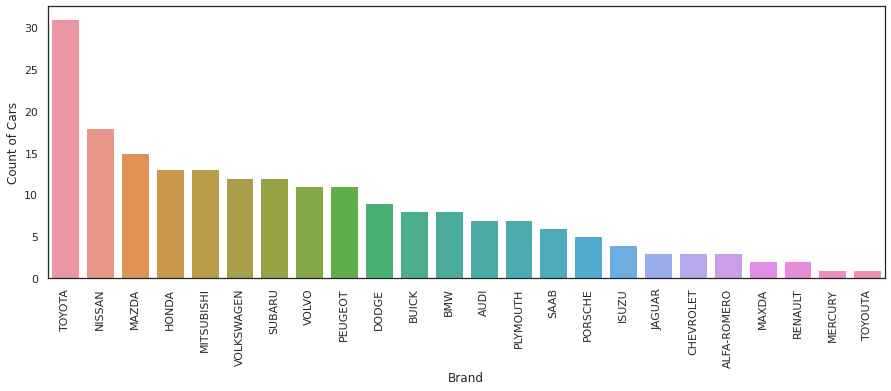

<Figure size 432x288 with 0 Axes>

In [26]:
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(automobile_price['brand'], order=pd.value_counts(automobile_price['brand']).index,)
plt1.set(xlabel = 'Brand', ylabel= 'Count of Cars')
plt.xticks(rotation = 90)
plt.show()
plt.tight_layout()

In [27]:
automobile_price.brand.describe()

count        205
unique        24
top       TOYOTA
freq          31
Name: brand, dtype: object

Toyota, a Japanese company has the most no of models.

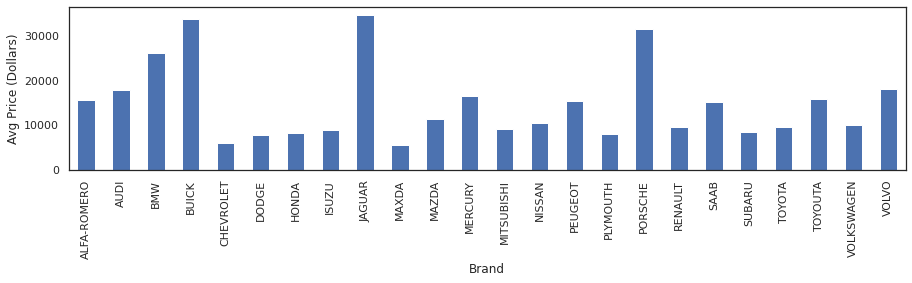

In [28]:
# Let's see average car price of each company.
automobile_price_comp_avg_price = automobile_price[['brand','price']].groupby("brand", as_index = False).mean().rename(columns={'price':'brand_avg_price'})
plt1 = automobile_price_comp_avg_price.plot(x = 'brand', kind='bar',legend = False, sort_columns = True, figsize = (15,3))
plt1.set_xlabel("Brand")
plt1.set_ylabel("Avg Price (Dollars)")
plt.xticks(rotation = 90)
plt.show()

In [29]:
#df_comp_avg_price
automobile_price = automobile_price.merge(automobile_price_comp_avg_price, on = 'brand')

In [30]:
automobile_price['brand_category'] = automobile_price['brand_avg_price'].apply(lambda x : "Budget" if x < 10000 
                                                     else ("Mid_Range" if 10000 <= x < 20000
                                                           else "Luxury"))

Toyota has considerably high no of models in the market. Brands can be categorised as Luxury, Mid Ranged, Budget based on their average price. Some of the Luxury brans are

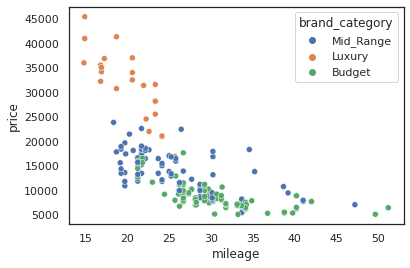

In [31]:
# Brand Category - Mileage : It is expected that luxury brands don't care about mileage. 
# Let's find out how price varies with brand category and mileage.
sns.scatterplot(x = 'mileage', y = 'price', hue = 'brand_category', data = automobile_price);

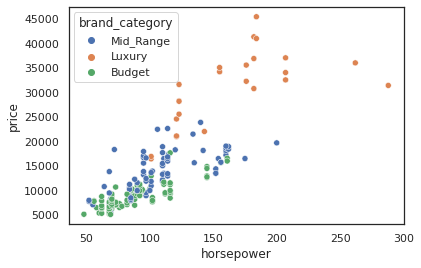

In [32]:
# Brand Category - Horsepower : It is expected that luxury brands have more horse power. 
# Let's find out how price varies with brand category and horse power.
sns.scatterplot(x = 'horsepower', y = 'price', hue = 'brand_category', data = automobile_price);

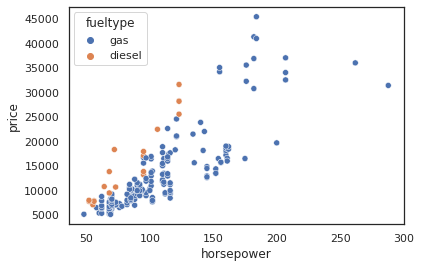

In [33]:
# Horsepower - Fuel Type : 
# Let's find out how price varies with brand category and horse power.
sns.scatterplot(x = 'horsepower', y = 'price', hue = 'fueltype', data = automobile_price);


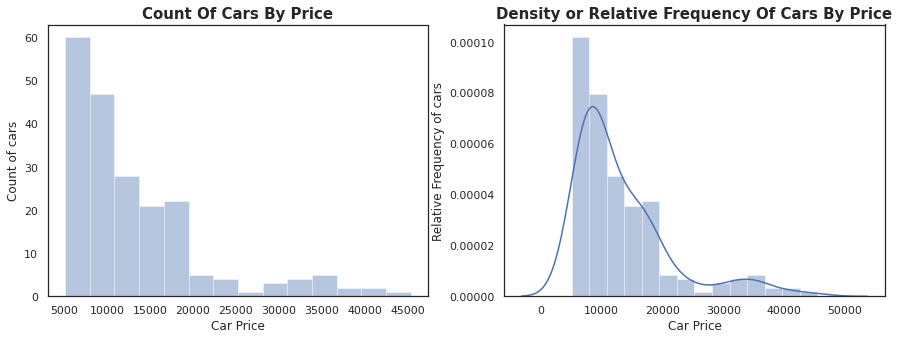

In [34]:
# target variable: price of car

fig, ax= plt.subplots(1,2,figsize=(15,5))

sns.distplot(automobile_price['price'], norm_hist=False, kde=False, ax=ax[0])
ax[0].set_xlabel('Car Price')
ax[0].set_ylabel('Count of cars',size=12)
ax[0].set_title('Count Of Cars By Price',size=15,weight="bold")

sns.distplot(automobile_price['price'], kde=True, ax=ax[1])
ax[1].set_xlabel('Car Price')
ax[1].set_ylabel('Relative Frequency of cars',size=12)
ax[1].set_title('Density or Relative Frequency Of Cars By Price',size=15,weight="bold");

Observations on Target Variable- Price:

The target variable price has a positive skew, however majority of the cars are low priced.
More than 50% of the cars (around 105-107 out of total of 205) are priced 10,000 and close to 35% cars are priced between 10,000 and 20,000. So around 85% of cars in US market are priced between 5,000 to 20,000.

Based on above observations and graph on right side (KDE/green one) it appears there are 2 distributions one for cars priced between 5,000 and 25000 and another distribution for high priced cars 25,000 and above. (Notice the approximate bell curve
from little less than 30000 upto 45,000/50,000)

To perform linear regression, the target variable should be linearly related to independent variables. Let's see whether that's true in this case.

In [35]:

#creating df  with numeric var's only
automobile_price_numeric= automobile_price.select_dtypes(include=['float64','int64'])
automobile_price_numeric.head()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,mileage,brand_avg_price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0,23.70,15498.333333
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0,23.70,15498.333333
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0,22.15,15498.333333
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0,26.70,17859.166714
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0,19.80,17859.166714


<Figure size 1440x720 with 0 Axes>

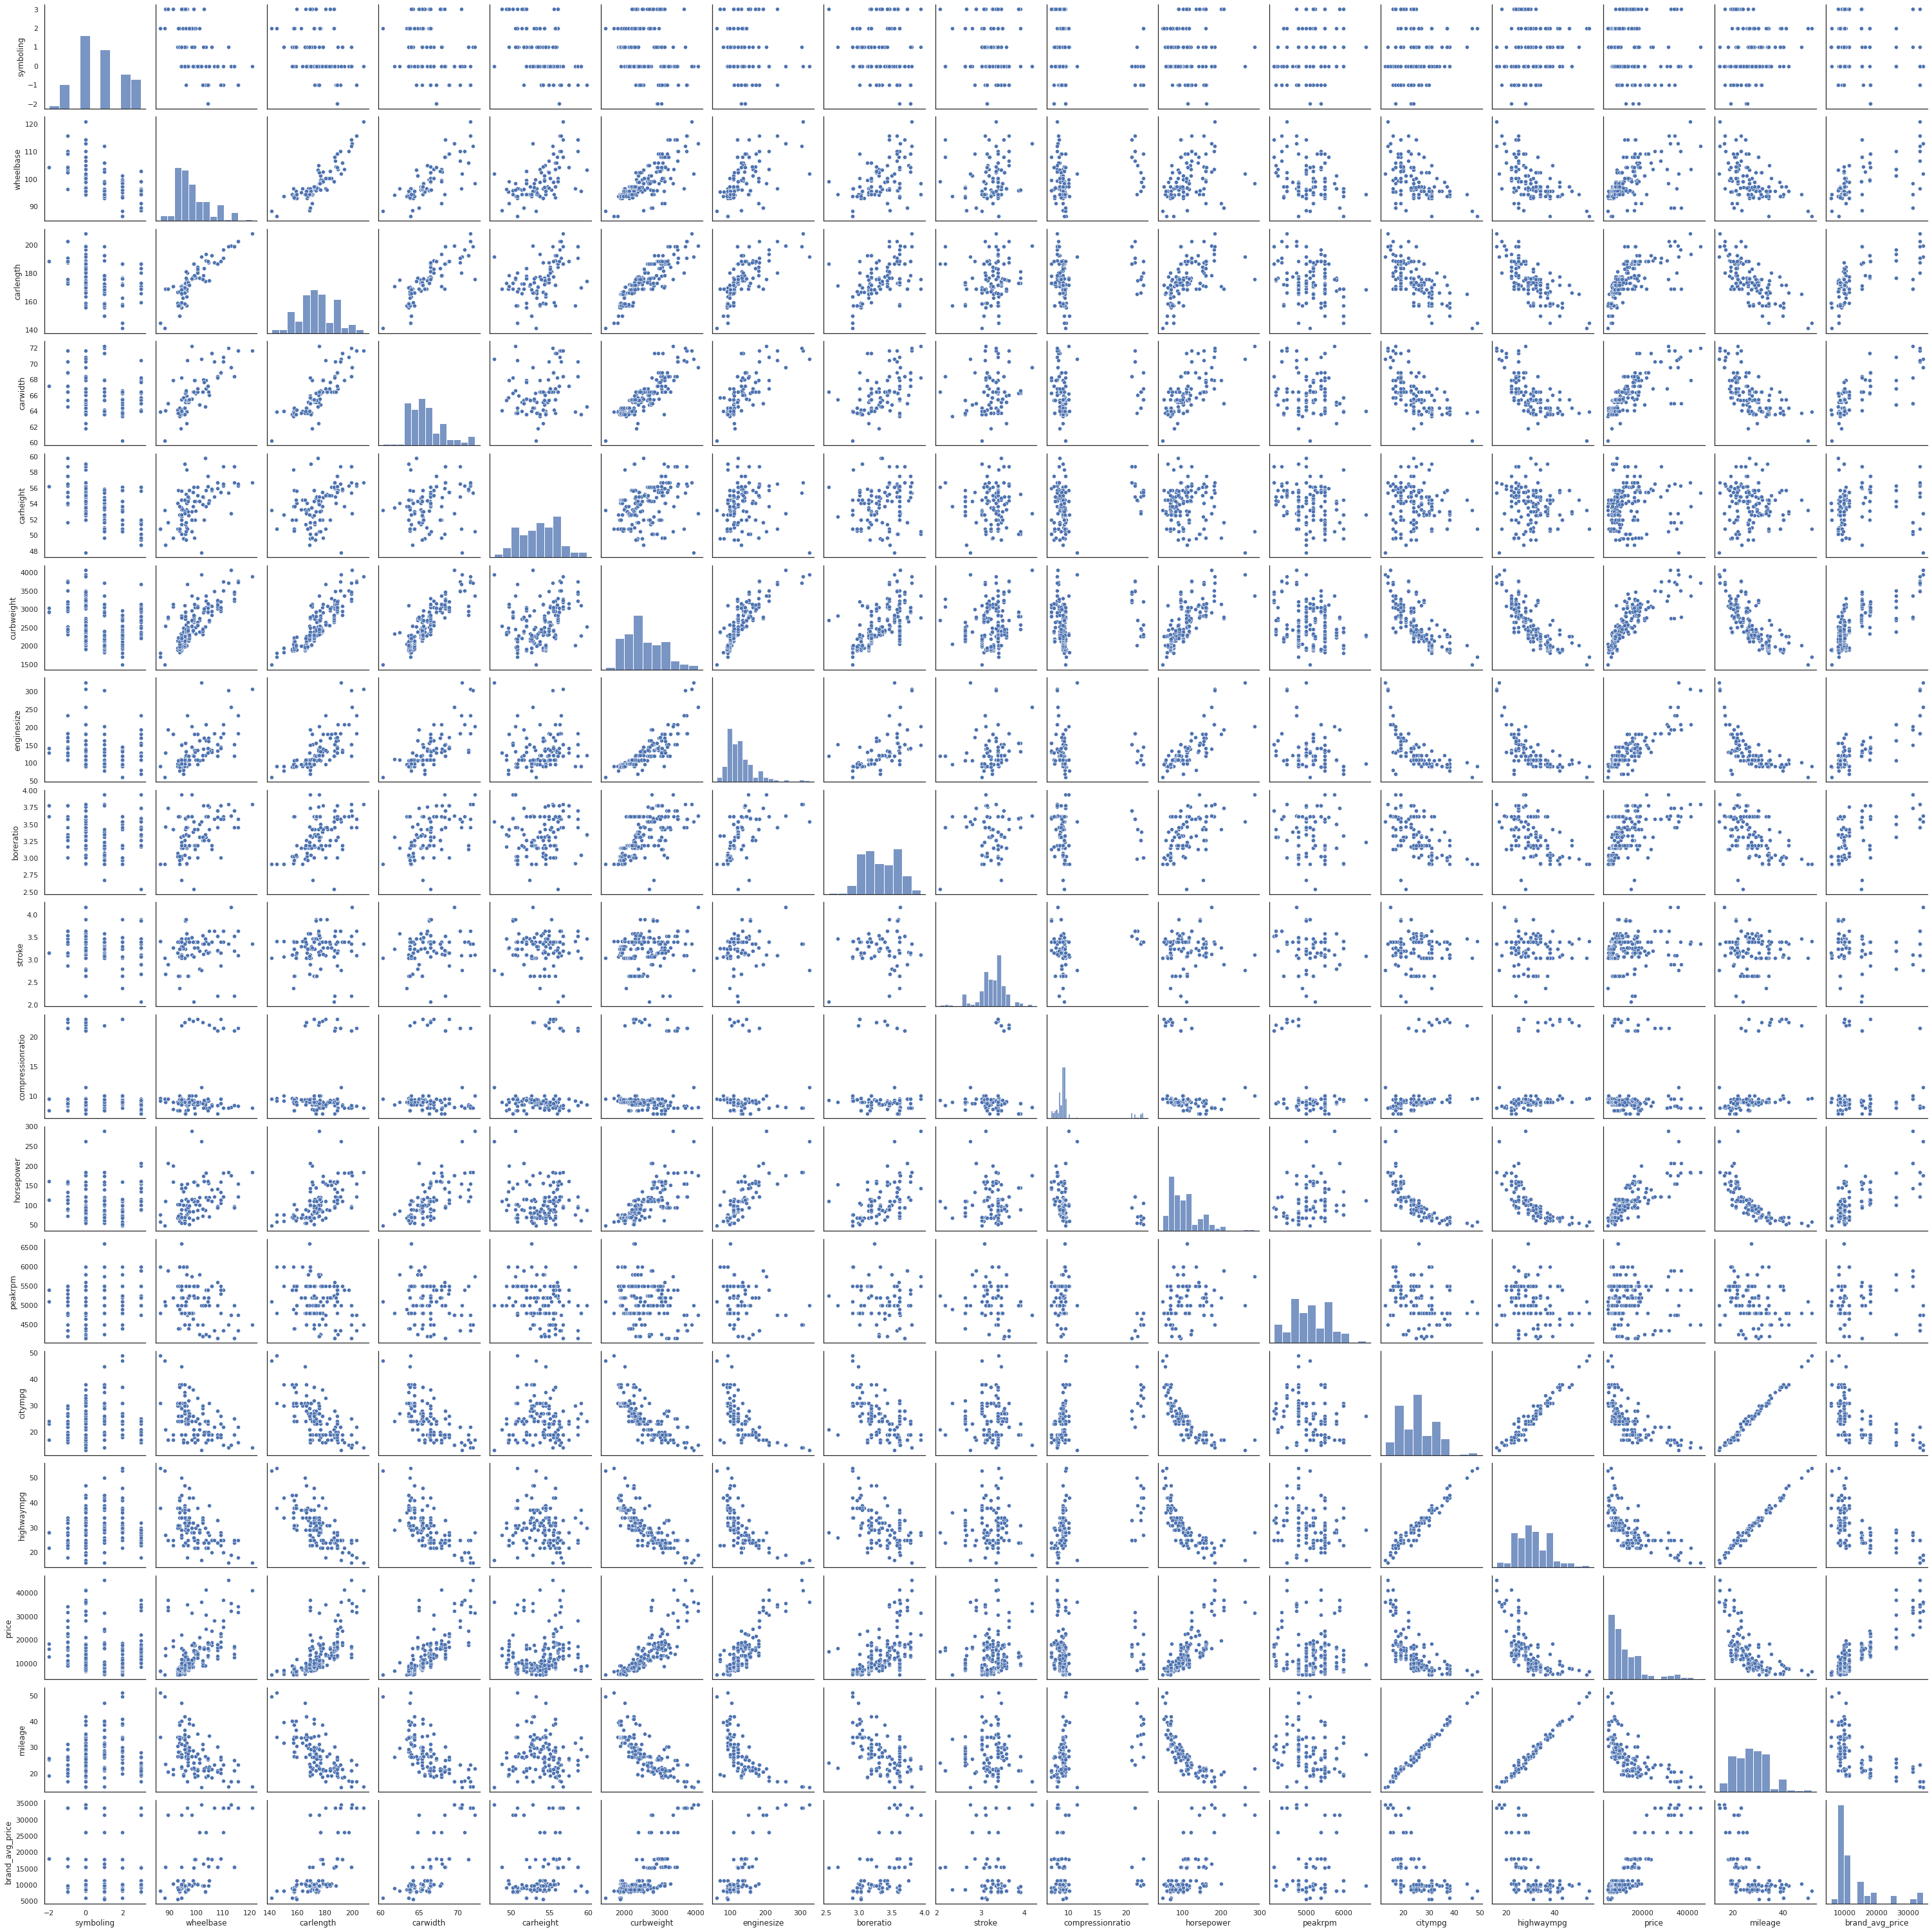

In [36]:
# paiwise scatter plot
plt.figure(figsize=(20, 10))
sns.pairplot(automobile_price_numeric);

#as we can see its difficult to interpret these graphs due to somany of them
#a BETTER way of checking linearity is in below cell

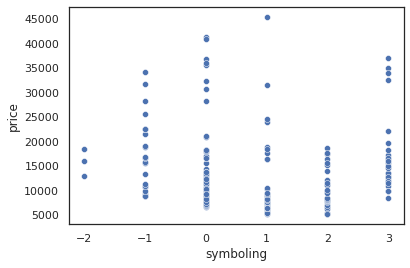

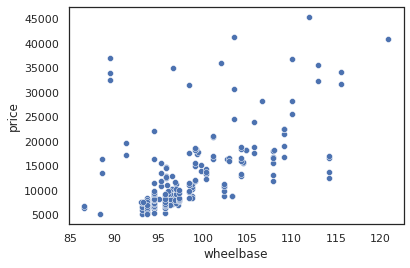

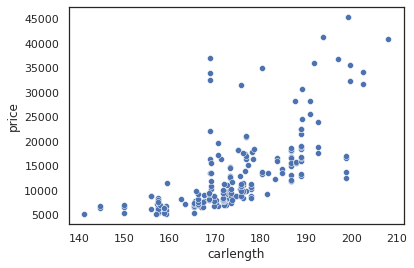

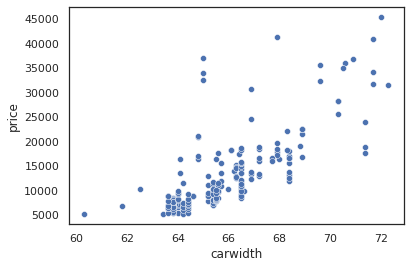

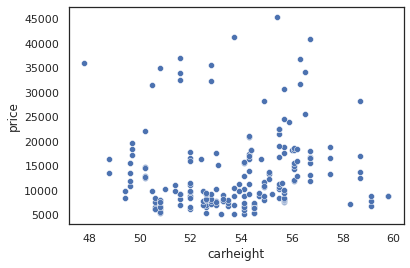

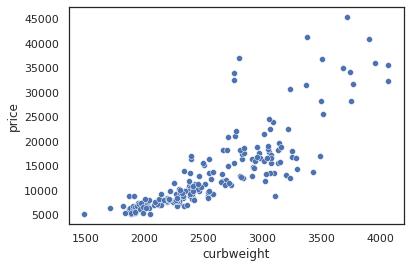

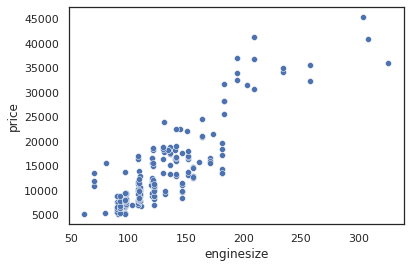

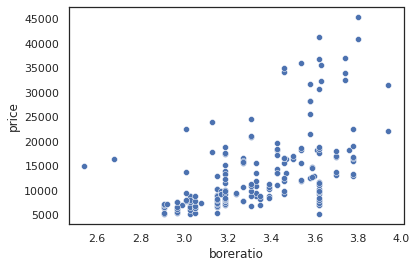

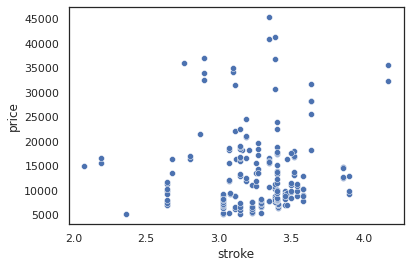

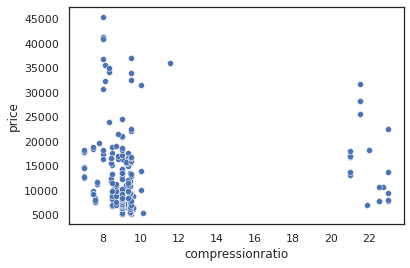

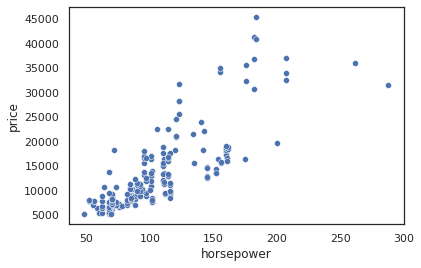

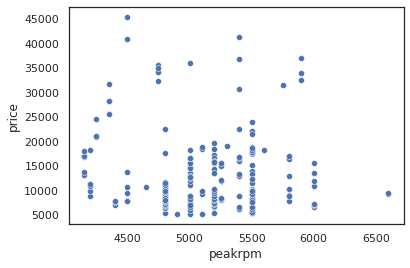

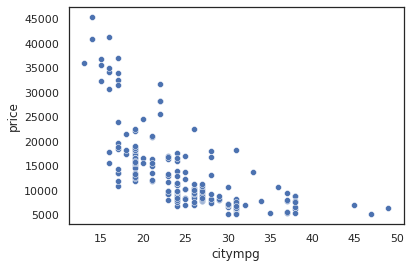

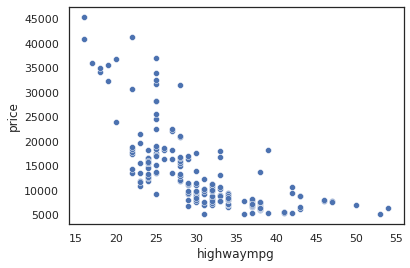

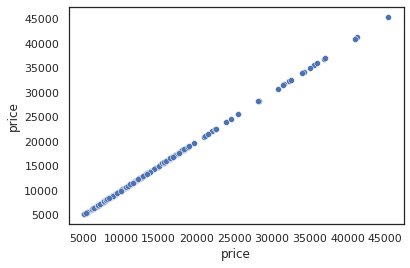

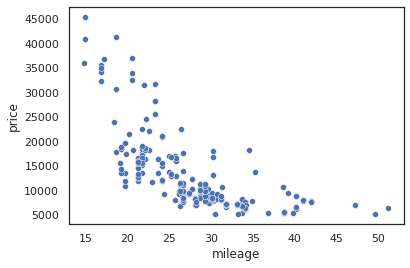

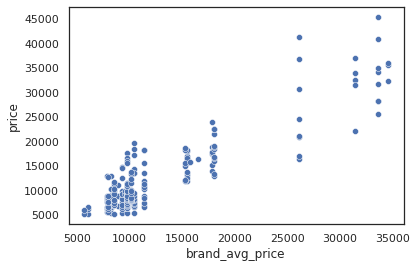

In [37]:
#LINEARITY CHECK>>>#to check price has linear relation or not with Indep. var's

for i, col in enumerate (automobile_price_numeric.columns):
    plt.figure(i)
    sns.scatterplot(x=automobile_price_numeric[col],y=automobile_price_numeric['price'])


These var's appears to have a linear relation with price: carwidth, curbweight, enginesize, horsepower, boreration and citympg.


Other variables either don't have a relation with price or relationship isn't strong. None of the varibales appear to have polynomial relation with price.


In linear regression assumptions validation section we will check for linearity assumption in detail

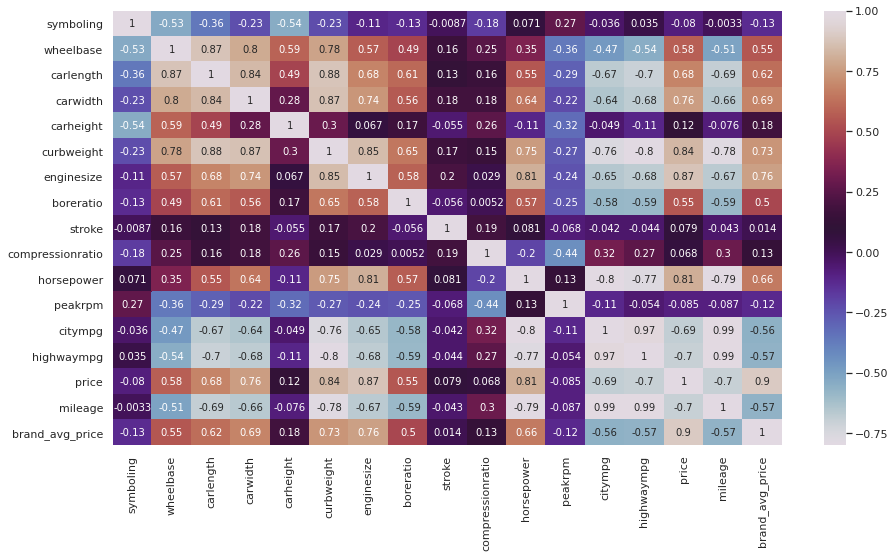

In [48]:
corr=automobile_price_numeric.corr()

plt.figure(figsize=(15,8))
sns.heatmap(corr,annot=True,cmap='twilight')

# **Useful insights**

1.Dependent var and indep. var's

Positive corr: Price highly correlated with enginesize, curbweight, horsepower, carwidth (all of these variables represent the size/weight/engine power of the car)

Negative corr: Price negatively corr with mpg var's citympg and highwaympg. This suggest that cars having high mileage may fall in the 'economy' cars category or in other words indicates that Low priced cars have mostly high mpg

2.Correlation among independent variables:

Many independent variables are highly correlated; wheelbase, carlength, curbweight, enginesize etc. are all measures of 'size/weight', and are positively correlated

Since indep. var's are highly correlated (more than 80% corr among many of them ) we'll have to pay attention to multicollinearity, which we will check in assumptions validation section using VIF score.

# **DATA CLEANING**

In [49]:
automobile_price.info()

#no missing values

#all var's in correct format, however since symboling is a categorical var we need to change its type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [50]:
# converting symboling to categorical
automobile_price['symboling'] = automobile_price['symboling'].astype('object')
automobile_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    object 
 1   make              205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [51]:
#Extracting car names. car name is the first word (before space)
make = automobile_price['make'].apply(lambda x: x.split(" ")[0])
make[:10]

0    alfa-romero
1    alfa-romero
2    alfa-romero
3           audi
4           audi
5           audi
6           audi
7           audi
8           audi
9           audi
Name: make, dtype: object

In [52]:
automobile_price['car_company']=make
automobile_price['car_company'].value_counts()

#many car names are duplicates like toyota and toyouta, porsche and porcshce etc.
# we need to fix incorrect spelling and get carnames column in order

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
porsche         4
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
vw              2
maxda           2
porcshce        1
mercury         1
Nissan          1
vokswagen       1
toyouta         1
Name: car_company, dtype: int64

In [53]:
#volkswagen
automobile_price.loc[(automobile_price['car_company']=="vw")|(automobile_price['car_company']=="vokswagen"),"car_company"]="volkswagen"

#porsche

automobile_price.loc[(automobile_price['car_company']=="porcshce"),"car_company"]="porsche"

#toyota
automobile_price.loc[(automobile_price['car_company']=="toyouta"),"car_company"]="toyota"

# nissan
automobile_price.loc[automobile_price['car_company'] == "Nissan", 'car_company'] = 'nissan'

# mazda
automobile_price.loc[automobile_price['car_company'] == "maxda", 'car_company'] = 'mazda'

automobile_price['car_company'].value_counts()

toyota         32
nissan         18
mazda          17
honda          13
mitsubishi     13
volkswagen     12
subaru         12
volvo          11
peugeot        11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
chevrolet       3
jaguar          3
alfa-romero     3
renault         2
mercury         1
Name: car_company, dtype: int64

In [54]:
# drop carname variable
automobile_price = automobile_price.drop('make', axis=1)

In [55]:
automobile_price.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    object 
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

# **DATA PREPRATION**

In [56]:
X=automobile_price.drop(columns=['price'])
y=automobile_price['price']

In [57]:
# creating dummy variables for categorical variables

automobile_price_categorical = X.select_dtypes(include=['object'])
automobile_price_categorical.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,brand,brand_category,car_company
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,ALFA-ROMERO,Mid_Range,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,ALFA-ROMERO,Mid_Range,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,ALFA-ROMERO,Mid_Range,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,AUDI,Mid_Range,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,AUDI,Mid_Range,audi


In [58]:
#creating dummy variables
cars_dummies = pd.get_dummies(automobile_price_categorical, drop_first=True)
cars_dummies.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,brand_AUDI,brand_BMW,brand_BUICK,brand_CHEVROLET,brand_DODGE,brand_HONDA,brand_ISUZU,brand_JAGUAR,brand_MAXDA,brand_MAZDA,brand_MERCURY,brand_MITSUBISHI,brand_NISSAN,brand_PEUGEOT,brand_PLYMOUTH,brand_PORSCHE,brand_RENAULT,brand_SAAB,brand_SUBARU,brand_TOYOTA,brand_TOYOUTA,brand_VOLKSWAGEN,brand_VOLVO,brand_category_Luxury,brand_category_Mid_Range,car_company_audi,car_company_bmw,car_company_buick,car_company_chevrolet,car_company_dodge,car_company_honda,car_company_isuzu,car_company_jaguar,car_company_mazda,car_company_mercury,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [59]:
X=X.drop(columns=automobile_price_categorical)
X.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,mileage,brand_avg_price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,23.70,15498.333333
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,23.70,15498.333333
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,22.15,15498.333333
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,26.70,17859.166714
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,19.80,17859.166714


In [60]:
cars_dummies.columns

Index(['symboling_-1', 'symboling_0', 'symboling_1', 'symboling_2',
       'symboling_3', 'fueltype_gas', 'aspiration_turbo', 'doornumber_two',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'brand_AUDI', 'brand_BMW',
       'brand_BUICK', 'brand_CHEVROLET', 'brand_DODGE', 'brand_HONDA',
       'brand_ISUZU', 'brand_JAGUAR', 'brand_MAXDA', 'brand_MAZDA',
       'brand_MERCURY', 'brand_MITSUBISHI', 'brand_NISSAN', 'brand_PEUGEOT',
       'brand_PLYMOUTH', 'brand_POR

In [61]:
dfX=pd.merge(X,cars_dummies,on=X.index)
dfX.columns

Index(['key_0', 'wheelbase', 'carlength', 'carwidth', 'carheight',
       'curbweight', 'enginesize', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'mileage',
       'brand_avg_price', 'symboling_-1', 'symboling_0', 'symboling_1',
       'symboling_2', 'symboling_3', 'fueltype_gas', 'aspiration_turbo',
       'doornumber_two', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'brand_AUDI', 'brand_BMW',
       'brand_BUICK

In [62]:
dfX.drop(columns='key_0',inplace=True)
dfX.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 95 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   wheelbase                 205 non-null    float64
 1   carlength                 205 non-null    float64
 2   carwidth                  205 non-null    float64
 3   carheight                 205 non-null    float64
 4   curbweight                205 non-null    int64  
 5   enginesize                205 non-null    int64  
 6   boreratio                 205 non-null    float64
 7   stroke                    205 non-null    float64
 8   compressionratio          205 non-null    float64
 9   horsepower                205 non-null    int64  
 10  peakrpm                   205 non-null    int64  
 11  citympg                   205 non-null    int64  
 12  highwaympg                205 non-null    int64  
 13  mileage                   205 non-null    float64
 14  brand_avg_

**SCALING THE FEATURES**

In [63]:
#scaling features though not necessary in MLR but its good to do it as it makes interpretation of regression coefficients easier

from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols=dfX.columns
dfX_scaled=pd.DataFrame(scale(dfX))
dfX_scaled.columns=cols
dfX_scaled.columns

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'mileage', 'brand_avg_price',
       'symboling_-1', 'symboling_0', 'symboling_1', 'symboling_2',
       'symboling_3', 'fueltype_gas', 'aspiration_turbo', 'doornumber_two',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_fwd', 'drivewheel_rwd',
       'enginelocation_rear', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_mpfi',
       'fuelsystem_spdi', 'fuelsystem_spfi', 'brand_AUDI', 'brand_BMW',
       'brand_BUICK', 'brand

In [64]:
dfX_scaled.describe()

#all numeric cols has means = 0 or as good as zero and std=1

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,mileage,brand_avg_price,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,...,brand_ISUZU,brand_JAGUAR,brand_MAXDA,brand_MAZDA,brand_MERCURY,brand_MITSUBISHI,brand_NISSAN,brand_PEUGEOT,brand_PLYMOUTH,brand_PORSCHE,brand_RENAULT,brand_SAAB,brand_SUBARU,brand_TOYOTA,brand_TOYOUTA,brand_VOLKSWAGEN,brand_VOLVO,brand_category_Luxury,brand_category_Mid_Range,car_company_audi,car_company_bmw,car_company_buick,car_company_chevrolet,car_company_dodge,car_company_honda,car_company_isuzu,car_company_jaguar,car_company_mazda,car_company_mercury,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
count,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,...,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02,2.050000e+02
mean,-1.496906e-15,3.730349e-15,9.964929e-16,-4.408398e-16,9.910771e-17,5.415722e-19,2.267021e-15,2.126483e-15,-3.115394e-16,1.914458e-16,6.553024e-17,1.104807e-16,1.743863e-16,1.018156e-15,-1.570559e-16,2.556221e-16,-3.791005e-17,3.596039e-16,2.003817e-17,-1.240200e-16,-2.147334e-16,-4.332578e-18,2.177120e-16,-1.773649e-16,-2.328760e-16,-7.582011e-17,-1.976739e-16,2.924490e-16,2.382918e-17,6.146845e-17,-8.732852e-17,2.407288e-16,-3.476894e-16,5.269498e-16,-2.263772e-16,1.538065e-16,-6.195586e-16,-3.206107e-16,-1.787188e-17,-7.040439e-17,...,2.412704e-16,-4.251342e-17,-2.205553e-16,5.892306e-16,-7.040439e-17,-4.744173e-16,-6.228080e-17,-4.947262e-16,-5.524037e-17,3.076130e-16,-1.252386e-16,-1.437874e-16,8.529762e-17,-3.991387e-16,-8.732852e-17,-6.452833e-16,3.552714e-16,-4.137612e-16,-4.115949e-17,-5.751497e-16,2.239401e-16,-2.076929e-16,-2.158165e-16,-4.405690e-16,1.841346e-16,2.412704e-16,-4.251342e-17,4.744173e-16,-7.040439e-17,-4.744173e-16,-6.228080e-17,-4.947262e-16,-5.524037e-17,3.076130e-16,-1.252386e-16,-1.437874e-16,8.529762e-17,-7.251652e-16,-6.452833e-16,3.552714e-16
std,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,...,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1.002448e+00,1

In [65]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dfX_scaled, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

# **MODEL BUILDING**

Since our dependent variable price looks to be linearly related to most of the independent variables we are using Linear Regression only and not other types of regression like Polynomial, Random Forest/Boosting regression etc.

In [66]:
# Model with all features
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

lm=LinearRegression()
lm.fit(X_train,y_train)

y_pred_test=lm.predict(X_test)
y_pred_train=lm.predict(X_train)

In [67]:
## Evaluation metrics

#Rsqaure
from sklearn.metrics import r2_score

print('R-sqaure on train data: {}'.format(r2_score(y_true=y_train, y_pred=y_pred_train)))
print('R-sqaure on test data: {}'.format(r2_score(y_true=y_test, y_pred=y_pred_test)))

#Standard error/RMSE
error_train=y_pred_train-y_train
error_test=y_pred_test-y_test

print('RMSE on train data: {}'.format(((error_train**2).mean())**0.5))
print('RMSE on test data: {}'.format(((error_test**2).mean())**0.5))

R-sqaure on train data: 0.9758765127550096
R-sqaure on test data: 0.8261207602423619
RMSE on train data: 1208.3212938854542
RMSE on test data: 3489.499398443826



Massive overfitting: All features in model is never a good idea unless features are too less and all of them are important, so using Recursive feature elimination to reduce dimensionality

# **FEATURE SELECTION USING RFE**

Lets first decide optimal number of features rather than arbitarily specifying count of features to be used in model in the RFE function

In [80]:
from sklearn.feature_selection import RFE
import statsmodels.api as sm

n_features_list = list(range(4, 31)) #checking for optimal number of features between 4 to 30
train_adjusted_r2 = []
train_r2 = []
test_r2 = []
train_RMSE=[]
test_RMSE=[]

for n_features in range(4, 31):

    # RFE with n features
    lm = LinearRegression()

    # specifying number of features
    rfe_n = RFE(estimator=lm, n_features_to_select=n_features)

    # fit with n features
    rfe_n.fit(X_train, y_train)

    # selecting features selected by rfe_n
    col_n = X_train.columns[rfe_n.support_] #rfe_n.support_: returns an array with boolean values to indicate whether 
    #an attribute was selected using RFE

    # training & test data for n selected columns
    X_train_rfe_n = X_train[col_n]
    X_test_rfe_n = X_test[col_n]

    # add a constant to the model
    X_train_rfe_n = sm.add_constant(X_train_rfe_n)


    X_test_rfe_n = sm.add_constant(X_test_rfe_n, has_constant='add')

    
    
    # fitting the model with n featues
    lm_n = sm.OLS(y_train, X_train_rfe_n).fit()
    
    
    # # Making predictions
    y_pred_test = lm_n.predict(X_test_rfe_n)
    y_pred_train = lm_n.predict(X_train_rfe_n)
    
    
    #Calculating evaluation metrics
    
    #R-square
    train_adjusted_r2.append(lm_n.rsquared_adj)
    train_r2.append(lm_n.rsquared)
    test_r2.append(r2_score(y_test, y_pred_test))

    #RMSE/stan. error
    error_test=y_pred_test-y_test
    error_train=y_pred_train-y_train
    
    test_RMSE.append(((error_test**2).mean())**0.5)
    train_RMSE.append(((error_train**2).mean())**0.5)

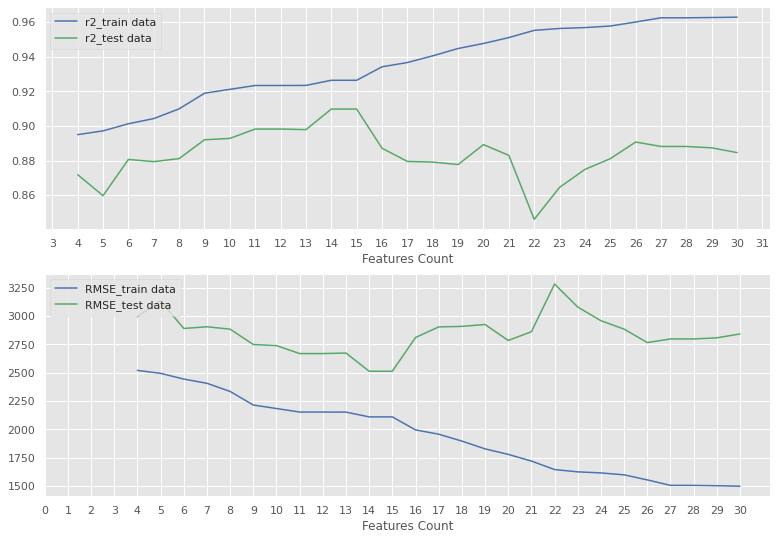

In [81]:
# plotting r2 and RMSE against n_features
import matplotlib.ticker as plticker

fig,ax=plt.subplots(2,1,figsize=(13, 9))
ax[0].plot(n_features_list, train_r2,'b', label="r2_train data")
ax[0].plot(n_features_list, test_r2,'g', label="r2_test data")
ax[0].set_xlabel('Features Count')

ax[0].legend(loc='upper left')
loc = plticker.MultipleLocator(base=1)
ax[0].xaxis.set_major_locator(loc) #method 1 of ticks

ax[1].plot(n_features_list, train_RMSE, 'B',label="RMSE_train data")
ax[1].plot(n_features_list, test_RMSE, 'g',label="RMSE_test data")
ax[1].set_xlabel('Features Count')


ax[1].legend(loc='upper left')
plt.xticks(np.arange(0, 31, step=1))#method 2 of ticks

plt.show()

From the above graphs we find:

1.R sqaure for test data peaks at 13 features and at this point model generalises well as train R2 is v close to test. Train R2 keep on increasing beyond 13 features but R2 keeps increasing as you add more features to train data. We have select number of features where model accuracy and generalization both are at satisfactory level.

2.RMSE for test data is lowest at 13 features and beyond that it increases. Train RMSE at 13 also looks good, adding more features to train decreases RMSE but again there is always a trade off between removing features (aka reducing complexity) and model performance. So we will go with 13 features.

# **Model Bulding with optimal features count**

In [71]:
lm=LinearRegression()
rfe=RFE(lm,13)
rfe.fit(X_train,y_train)

col=X_train.columns[rfe.support_] #obtaining fetaure names of 12 most imp 

#making new Df's with  12 most imp features as per RFE algorithm
X_train_13= X_train[col]
X_test_13 = X_test[col]


# add a constant to the model
X_train_13 = sm.add_constant(X_train_13,has_constant='add')
X_test_13 = sm.add_constant(X_test_13,has_constant='add')


#fit OLS model
lm_sm=sm.OLS(y_train,X_train_13).fit()

#making predictions
y_pred_train=lm_sm.predict(X_train_13)
y_pred_test=lm_sm.predict(X_test_13)


#evlaution metrics

#R-sqaure
train_r2=lm_sm.rsquared
test_r2=r2_score(y_pred_test, y_test)

#RMSE/stan. error
error_test=y_pred_test-y_test
error_train=y_pred_train-y_train
    
test_RMSE=(((error_test**2).mean())**0.5)
train_RMSE=(((error_train**2).mean())**0.5)

print('----------------------R-sqaure-------------------------------------------')
print("R-sq for test data is {}".format(test_r2))
print("R-sq for train data is {}".format(train_r2))


print('----------------------STANDARD ERROR/RMSE-------------------------------------------')
print("RMSE for test data is {}".format(test_RMSE))
print("RMSE for train data is {}".format(train_RMSE))

print(lm_sm.summary())

----------------------R-sqaure-------------------------------------------
R-sq for test data is 0.8519004081832365
R-sq for train data is 0.9234573931124221
----------------------STANDARD ERROR/RMSE-------------------------------------------
RMSE for test data is 2674.24452795692
RMSE for train data is 2152.3555240537194
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     130.7
Date:                Sat, 03 Jul 2021   Prob (F-statistic):           2.32e-66
Time:                        07:11:57   Log-Likelihood:                -1300.3
No. Observations:                 143   AIC:                             2627.
Df Residuals:                     130   BIC:                             2665.
Df Model:                          12        

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

[2] The smallest eigenvalue is 1.3e-29. This might indicate that there are strong multicollinearity problems or that the design matrix is singular.

Observations from above numbers:

1. R-sqaure for both test & train looks good
2. RMSE for both is closer (test is little < train which is fine and shows that model generalizes well)

Below Graph also shows predictions are mostly close to Actual values:

Text(0.5, 0, 'Index')

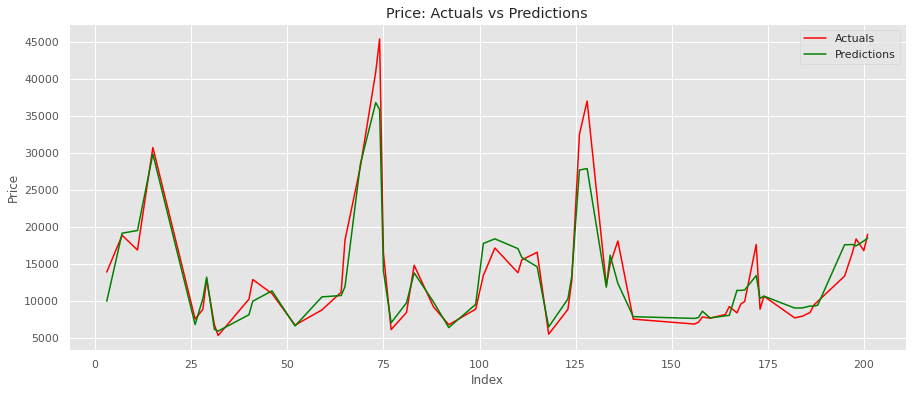

In [77]:
plt.style.use('ggplot')
fig, ax=plt.subplots(figsize=(15,6))
sns.lineplot(x=y_test.index,y=y_test,label='Actuals',color='RED',ax=ax)
sns.lineplot(x=y_test.index,y=y_pred_test,label='Predictions',color='GREEN',ax=ax)
ax.set_title('Price: Actuals vs Predictions')
ax.set_ylabel('Price')
ax.set_xlabel('Index')